In [ ]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns

 from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
 from sklearn.preprocessing import StandardScaler

 from sklearn.ensemble import RandomForestClassifier
 from sklearn.svm import SVC
 from sklearn.metrics import confusion_matrix



In [ ]:
wine_df=pd.read_csv("winequality-red.csv")
print("Dataset Shape:",wine_df.shape)
wine_df.head()

Dataset Shape: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: xlabel='quality', ylabel='fixed acidity'>

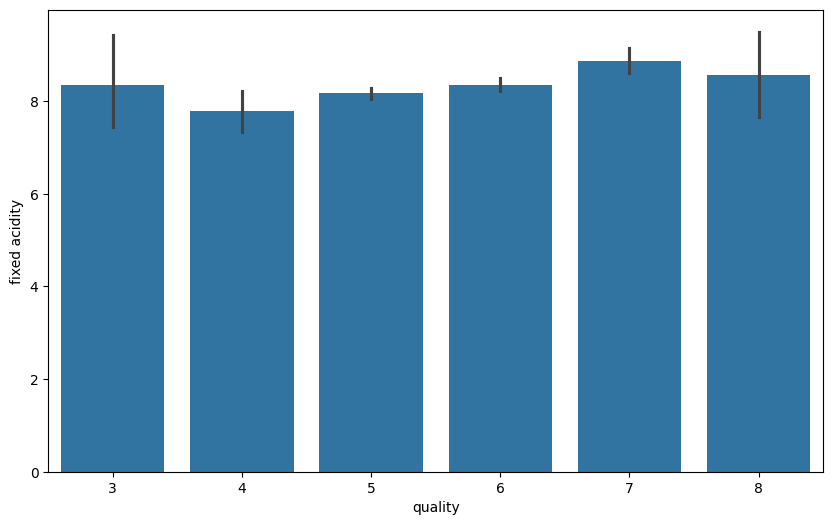

In [ ]:
#fixed acidity vs quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='fixed acidity',data=wine_df)

<Axes: xlabel='quality', ylabel='volatile acidity'>

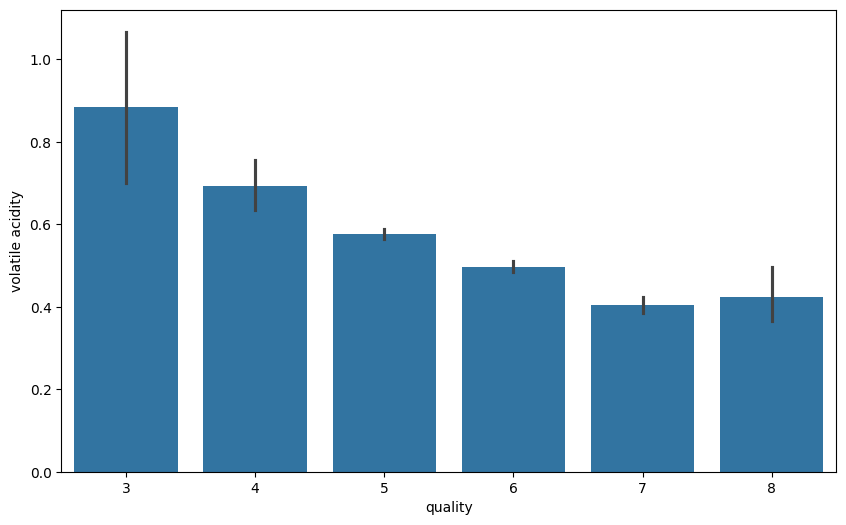

In [ ]:
#volatile acidity vs quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='volatile acidity',data=wine_df)

downing trend in above plot


<Axes: xlabel='quality', ylabel='citric acid'>

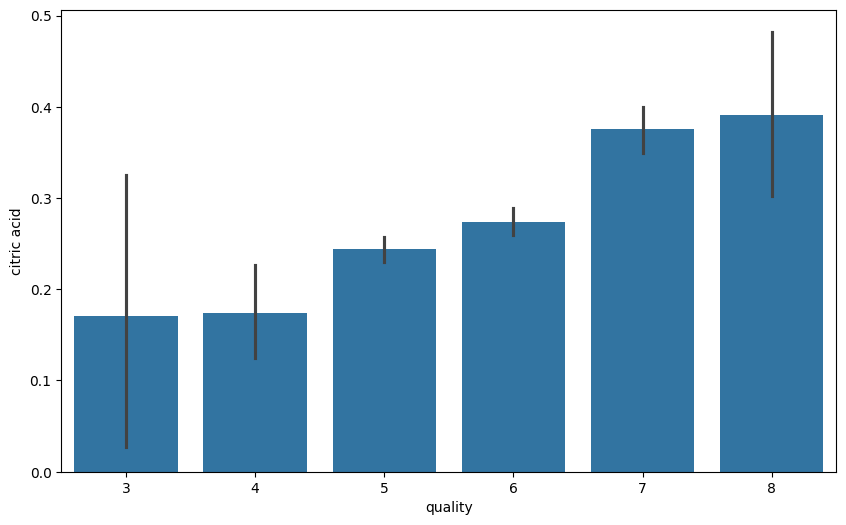

In [ ]:
#cireic acid vs quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='citric acid',data=wine_df)

increasing trend

<Axes: xlabel='quality', ylabel='residual sugar'>

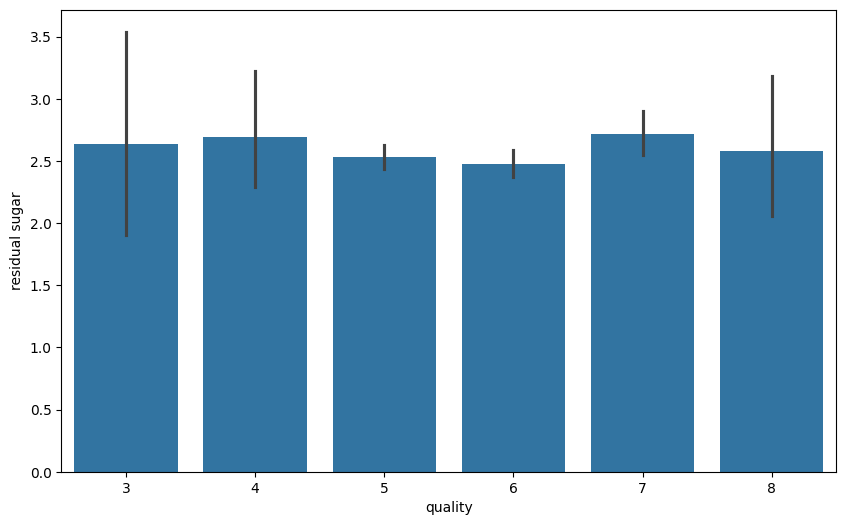

In [ ]:
#residual sugar vs quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='residual sugar',data=wine_df)

<Axes: xlabel='quality', ylabel='chlorides'>

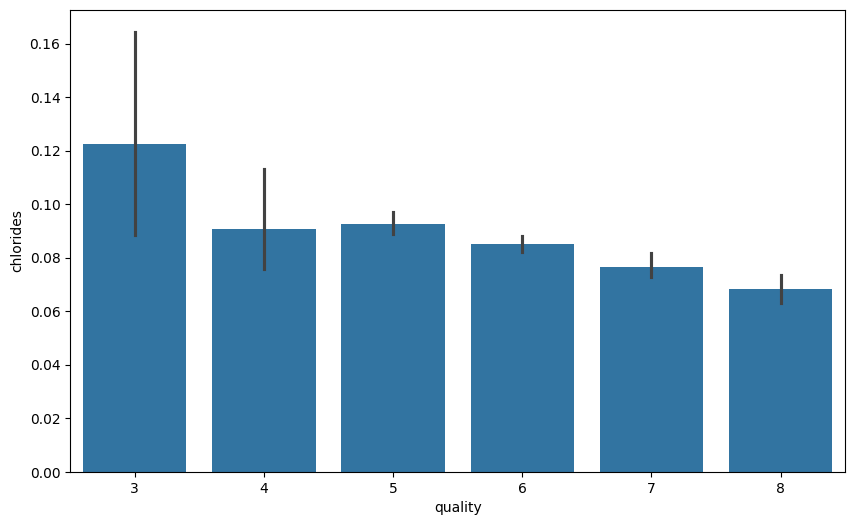

In [ ]:
#chlorides vs quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='chlorides',data=wine_df)

downing trend

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

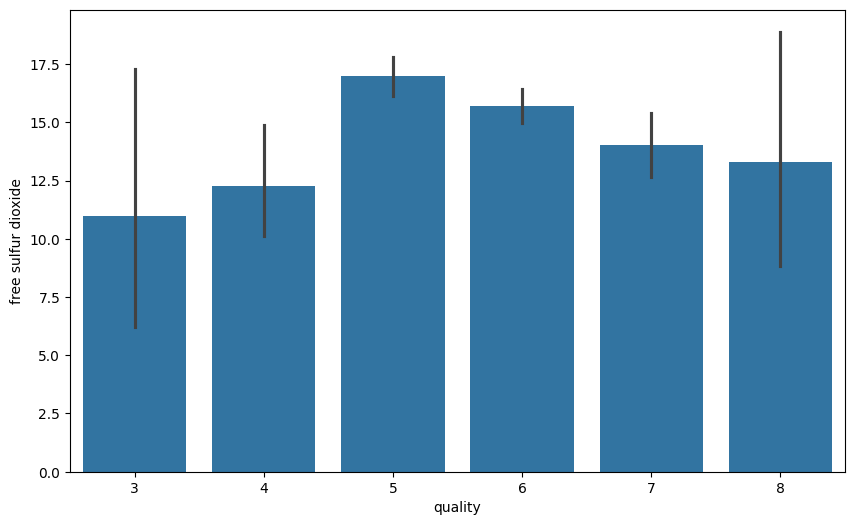

In [ ]:
#free sulfur dioxide  vs quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='free sulfur dioxide',data=wine_df)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

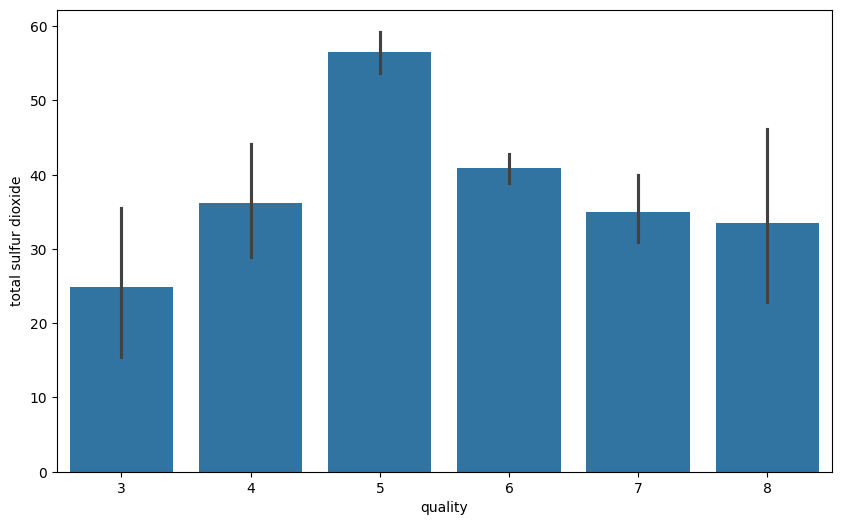

In [ ]:
#total sulfur dioxide  vs quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='total sulfur dioxide',data=wine_df)

<Axes: xlabel='quality', ylabel='sulphates'>

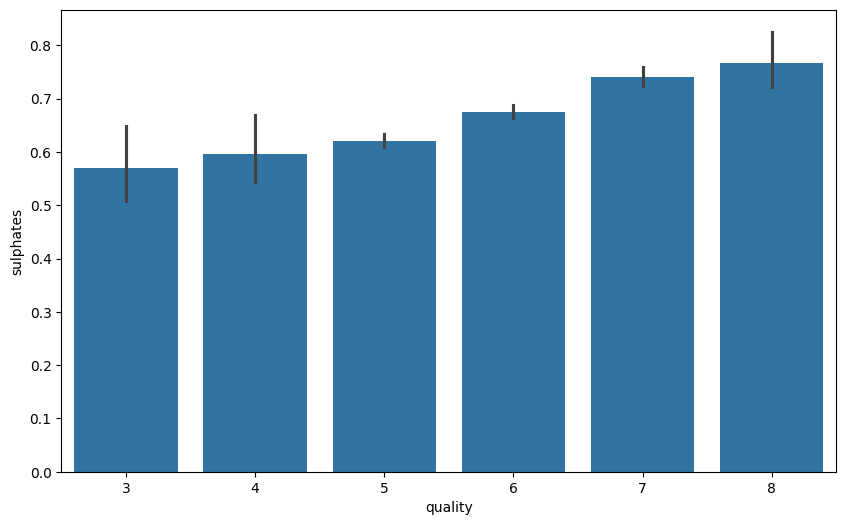

In [ ]:
#sulphates  vs quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='sulphates',data=wine_df)

increasing trend

<Axes: xlabel='quality', ylabel='alcohol'>

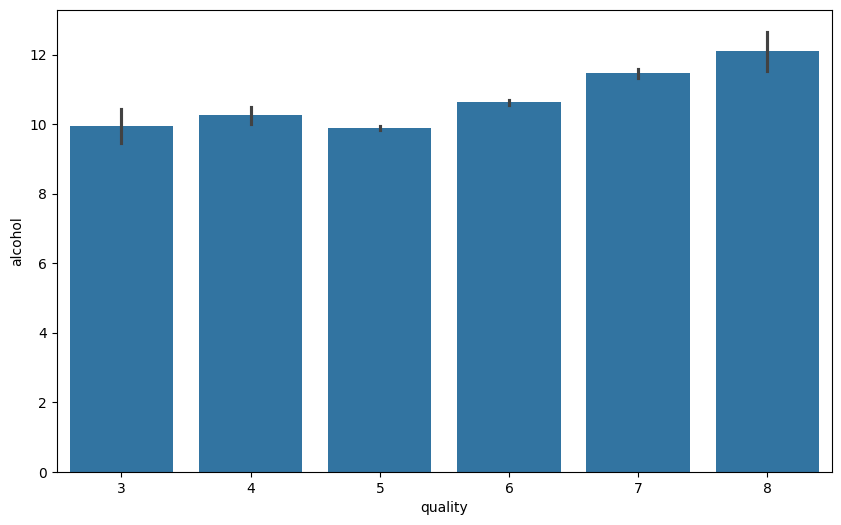

In [ ]:
#alchohol  vs quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='alcohol',data=wine_df)

increasing trend

<Axes: xlabel='quality', ylabel='pH'>

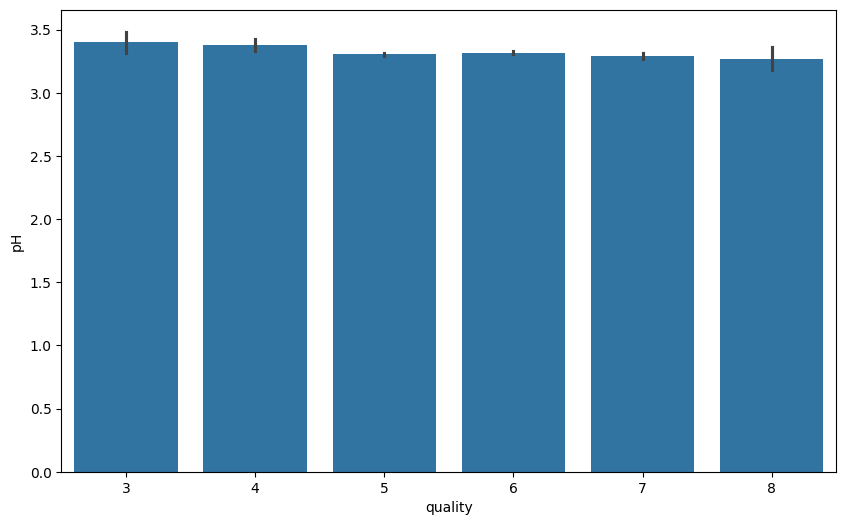

In [ ]:
#pH  vs quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='pH',data=wine_df)

downing trend

In [ ]:
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
#classifying wine qulaity as good or bad
#if quality<6.5, bad     ;0
#else good               ;1
wine_df['quality']=wine_df['quality'].apply(lambda x:1 if x>6.5 else 0)
wine_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


0    1382
1     217
Name: quality, dtype: int64


<Axes: ylabel='count'>

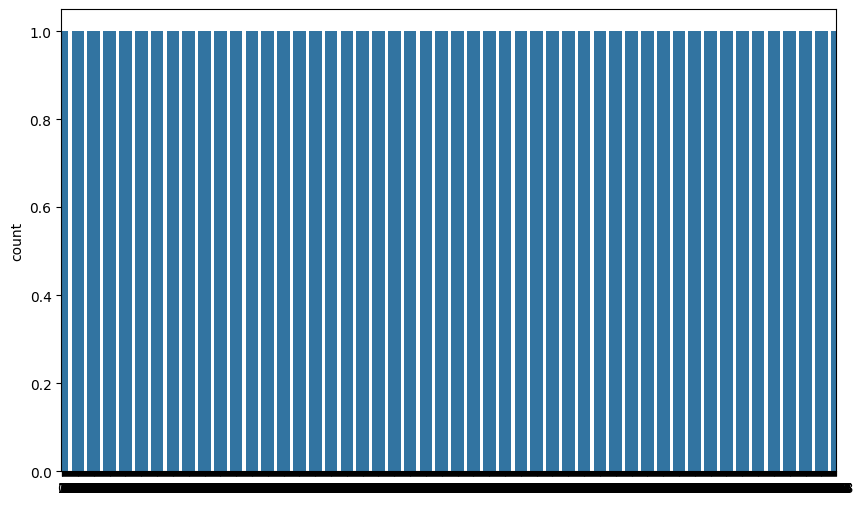

In [ ]:
print(wine_df['quality'].value_counts())
fig=plt.figure(figsize=(10,6))
sns.countplot(wine_df['quality'])

In [ ]:
#seperating to dependant and independant variables

x=wine_df.iloc[:,:-1].values
y=wine_df.iloc[:,-1].values
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#splitting into train and test sets

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print("x-train shape:",x_train.shape)
print("x-test shape:",x_test.shape)
print("y-train shape:",y_train.shape)
print("y-test shape:",y_test.shape)

x-train shape: (1279, 11)
x-test shape: (320, 11)
y-train shape: (1279,)
y-test shape: (320,)


In [ ]:
#applying standard scaling to the dataset to scale all the field values to same scale

sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
x_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [ ]:
rf_regressor=RandomForestClassifier(n_estimators=100)

rf_regressor.fit(x_train,y_train)

y_pred=rf_regressor.predict(x_test)


[[263  10]
 [ 28  19]]


<Figure size 1000x600 with 0 Axes>

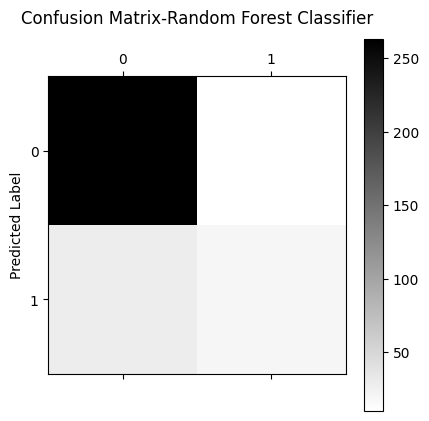

In [ ]:

cm=confusion_matrix(y_test,y_pred)
print(cm)

fig=plt.figure(figsize=(10,6))
plt.matshow(cm,cmap=plt.cm.binary,interpolation='nearest')
plt.title("Confusion Matrix-Random Forest Classifier\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.ylabel("Predicted Label")
plt.show()


In [ ]:
print("Total Prediction :",len(y_pred))
print("Correct Prediction :",sum(y_pred == y_test))
print("Incorrect Prediction :",sum(y_pred != y_test))
print("Accuracy :",sum(y_pred == y_test)*100/len(y_pred),"%")

Total Prediction : 320
Correct Prediction : 282
Incorrect Prediction : 38
Accuracy : 88.125 %


Support Vector Classifier(SVC)

In [ ]:
svc_regressor=SVC()
svc_regressor.fit(x_train,y_train)
y_pred=svc_regressor.predict(x_test)


[[268   5]
 [ 35  12]]


<Figure size 1000x600 with 0 Axes>

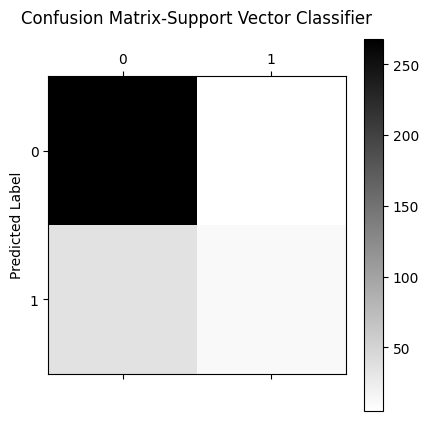

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

fig=plt.figure(figsize=(10,6))
plt.matshow(cm,cmap=plt.cm.binary,interpolation='nearest')
plt.title("Confusion Matrix-Support Vector Classifier\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.ylabel("Predicted Label")
plt.show()

In [ ]:
print("Total Prediction :",len(y_pred))
print("Correct Prediction :",sum(y_pred == y_test))
print("Incorrect Prediction :",sum(y_pred != y_test))
print("Accuracy :",sum(y_pred == y_test)*100/len(y_pred),"%")

Total Prediction : 320
Correct Prediction : 280
Incorrect Prediction : 40
Accuracy : 87.5 %


# TUNING ML ALGORITHM



1.   SVC



In [ ]:
param={
    'C':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear','rbf'],
    'gamma':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

grid_svc =GridSearchCV(svc_regressor,param_grid=param,scoring='accuracy',cv=10)

In [ ]:
grid_svc.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
print("Best parameters for SVC:",grid_svc.best_params_)

Best parameters for SVC: {'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}


Confusion Matrix :
 [[271   2]
 [ 31  16]]


<Figure size 1000x600 with 0 Axes>

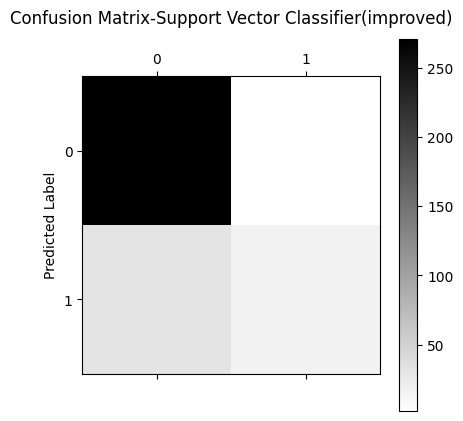

In [ ]:
svc_regressor2=SVC(C=1.2,gamma=0.9,kernel='rbf')
svc_regressor2.fit(x_train,y_train)
y_pred_svc=svc_regressor2.predict(x_test)

cm_svc2=confusion_matrix(y_test,y_pred_svc)
print("Confusion Matrix :\n",cm_svc2)

fig=plt.figure(figsize=(10,6))
plt.matshow(cm_svc2,cmap=plt.cm.binary,interpolation='nearest')
plt.title("Confusion Matrix-Support Vector Classifier(improved)\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.ylabel("Predicted Label")
plt.show()

In [ ]:
print("Total Prediction :",len(y_pred))
print("Correct Prediction :",sum(y_pred == y_test))
print("Incorrect Prediction :",sum(y_pred != y_test))
print("Accuracy :",sum(y_pred == y_test)*100/len(y_pred),"%")

Total Prediction : 320
Correct Prediction : 287
Incorrect Prediction : 33
Accuracy : 89.6875 %





2.   RANDOM FOREST CLASSIFIER



In [ ]:
rf_eval=cross_val_score(estimator=rf_regressor,X=x_train,y=y_train,cv=10)
rf_eval.mean()

0.9116818405511811